# Semana 1 – Día 2: Introducción a NumPy y Pandas

**Objetivo del día**  
1. Conocer la librería **NumPy** para manejo de arreglos numéricos.  
2. Introducir **Pandas** para análisis y manipulación de datos tabulares.  
3. Practicar con un dataset real (.csv) y realizar operaciones básicas.

> Asegúrate de tener instaladas las librerías:  
> ```bash
> pip install numpy pandas
> ```


In [2]:
import numpy as np
import pandas as pd
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)

NumPy version: 2.3.0
Pandas version: 2.3.0


## 1. NumPy – arreglos y operaciones básicas

In [7]:
# Crear arreglos
arreglo = np.array([1, 2, 3, 4, 5])       # 1D
matriz  = np.arange(1, 10).reshape(3, 3)  # 2D

print('Arreglo:', arreglo)
print('Matriz:\n', matriz)


Arreglo: [1 2 3 4 5]
Matriz:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
# Operaciones element‑wise
print('arreglo + 10 →', arreglo + 10)
print('matriz * 2  →\n', matriz * 2)


arreglo + 10 → [11 12 13 14 15]
matriz * 2  →
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [8]:
# Indexado y slicing
print('arreglo[0]   →', arreglo[0])
print('matriz[1, :] →', matriz[1, :])  # segunda fila


arreglo[0]   → 1
matriz[1, :] → [4 5 6]


### ✏️ Desafío 1  
1. Crea una función `estadisticas_np(arr)` que reciba un arreglo y devuelva su media, mediana y desviación estándar.  
2. Prueba la función con al menos dos arreglos diferentes.


In [9]:


def estadisticas_np(arr):
    media = np.mean(arr)
    mediana = np.median(arr)
    desviacion = np.std(arr)
    return media, mediana, desviacion

In [10]:
# Arreglo 1
arr1 = np.array([10, 20, 30, 40, 50])
res1 = estadisticas_np(arr1)
print("Arreglo 1:", arr1)
print("Media:", res1[0], "| Mediana:", res1[1], "| Desviación estándar:", res1[2])
print()

# Arreglo 2
arr2 = np.array([3, 5, 8, 13, 21, 34])
res2 = estadisticas_np(arr2)
print("Arreglo 2:", arr2)
print("Media:", res2[0], "| Mediana:", res2[1], "| Desviación estándar:", res2[2])

Arreglo 1: [10 20 30 40 50]
Media: 30.0 | Mediana: 30.0 | Desviación estándar: 14.142135623730951

Arreglo 2: [ 3  5  8 13 21 34]
Media: 14.0 | Mediana: 10.5 | Desviación estándar: 10.708252269472673


## 2. Pandas – Series y DataFrames

In [11]:
# Creamos una Serie y un DataFrame simples
serie = pd.Series([10, 15, 17, 21], name='edades')
df = pd.DataFrame({'nombre': ['Ana', 'Luis', 'Sofía', 'Pedro'],
                   'edad':   [23, 21, 19, 24],
                   'ciudad': ['MTY', 'CDMX', 'GDL', 'MTY']})

display(serie)
display(df)


0    10
1    15
2    17
3    21
Name: edades, dtype: int64

,nombre,edad,ciudad
0,Ana,23,MTY
1,Luis,21,CDMX
2,Sofía,19,GDL
3,Pedro,24,MTY


In [13]:
# Calculamos operaciones comunes en un DataFrame llamado 'df'

# Imprimir el promedio de la columna 'edad'
print('Promedio de edad:', df['edad'].mean())

# Imprimir un salto de línea y el título del segundo análisis
print('\nConteo por ciudad:')

# Contar cuántas veces aparece cada ciudad en la columna 'ciudad'
print(df['ciudad'].value_counts())

Promedio de edad: 21.75

Conteo por ciudad:
ciudad
MTY     2
CDMX    1
GDL     1
Name: count, dtype: int64


### 2.1 Cargar un dataset desde CSV

Descarga (o coloca) un archivo llamado **`ventas.csv`** en la misma carpeta.  
Elige un dataset pequeño con columnas como `producto, precio, cantidad, categoria`.


In [14]:
# Cargar el archivo CSV (descomenta y actualiza la ruta si es necesario)
# ventas = pd.read_csv('ventas.csv')
# display(ventas.head())
import pandas as pd

# Cargar el archivo CSV
ventas = pd.read_csv('ventas.csv')

# Mostrar las primeras filas del DataFrame
display(ventas.head())

,producto,precio,cantidad,categoria
0,Laptop,15000,2,Tecnología
1,Mouse,300,5,Accesorios
2,Teclado,700,3,Accesorios
3,Monitor,5000,1,Tecnología
4,Audífonos,1200,4,Audio


### ✏️ Desafío 2  
Con el DataFrame `ventas`:
1. Calcula el ingreso total (`precio * cantidad`) por fila y agrégalo como una nueva columna.  
2. Filtra las filas donde la `cantidad` sea mayor o igual a 10.  
3. Agrupa por `categoria` y muestra la suma de ingresos por cada categoría.


In [36]:
import pandas as pd
from IPython.display import display

# Cargar archivo CSV
ventas = pd.read_csv('ventas.csv')

# 1. Calcular ingreso por fila
ventas['ingreso'] = ventas['precio'] * ventas['cantidad']

# 2. Filtrar donde cantidad >= 10
ventas_mayor_10 = ventas[ventas['cantidad'] >= 1]
display(ventas_mayor_10)

# 3. Agrupar por categoría y sumar ingresos
ingresos_por_categoria = ventas.groupby('categoria')['ingreso'].sum()
print('\nIngresos por categoría:')
print(ingresos_por_categoria)

,producto,precio,cantidad,categoria,ingreso
0,Laptop,15000,2,Tecnología,30000
1,Mouse,300,5,Accesorios,1500
2,Teclado,700,3,Accesorios,2100
3,Monitor,5000,1,Tecnología,5000
4,Audífonos,1200,4,Audio,4800
5,Silla Gamer,4500,2,Muebles,9000



Ingresos por categoría:
categoria
Accesorios     3600
Audio          4800
Muebles        9000
Tecnología    35000
Name: ingreso, dtype: int64


## 🚀 Desafío Opcional  
Usa Matplotlib (o el método `.plot()` de Pandas) para graficar la cantidad total vendida por categoría.  
> No te preocupes por estilos o colores específicos por ahora.


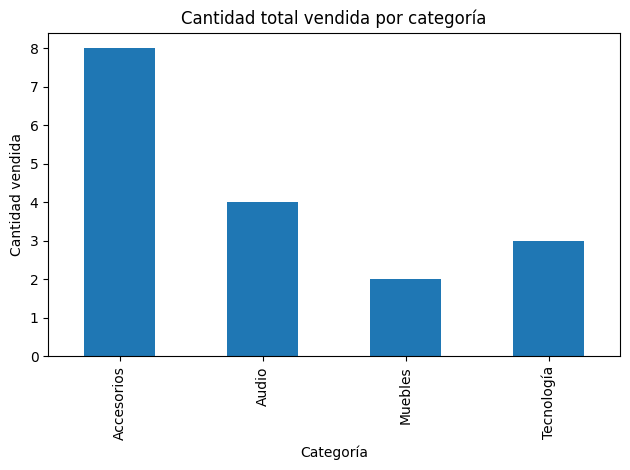

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo CSV
ventas = pd.read_csv('ventas.csv')

# Agrupar por categoría y sumar la cantidad vendida
cantidad_por_categoria = ventas.groupby('categoria')['cantidad'].sum()

# Graficar usando Pandas (que internamente usa Matplotlib)
cantidad_por_categoria.plot(kind='bar')

# Opcional: mejorar la gráfica con títulos
plt.title('Cantidad total vendida por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad vendida')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

---
**¡Buen trabajo!** Cuando termines, guarda el notebook y súbelo a tu repositorio en:
```
fundamentals/week01/day02_numpy_pandas.ipynb
```